In [13]:
run optgrowth.ipynb

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import compute_fixed_point
from joblib import Memory
memory=Memory(cachedir='./joblib_cache')

@memory.cache
def compute_value_function_cached(grid, beta, alpha, shocks):
    """
    compute the value function by iterating on the bellman operator.
    the work is done by quantecon's compute_fixed_point function.
    """
    Tw=np.empty(len(grid))
    initial_w=5*np.log(grid)-25
    
    v_star=compute_fixed_point(bellman_operator,
                              initial_w,
                              1e-4,  #error_tol
                              100,   #max_iter
                              True, #verbose
                              5,      #print_skip
                              grid,
                              beta,
                              np.log,
                              lambda k: k**alpha,
                              shocks,
                              Tw=Tw,
                              compute_policy=False)
    return v_star

class LogLinearGrowthModel:
    """
    stores parameters and computes solutions for the basic log utility/ cobb
    douglas production growth models. shocks are lognormal.
    """
    def __init__(self,
                alpha=0.65,     #production parameter
                beta=0.95,       #discount factor
                mu=1,              #first parameter in lognorm(mu, sigma)
                sigma=0.1,       #second parameter in lognorm(mu, sigma)
                grid_max=8,
                grid_size=150):
        
        self.alpha, self.beta, self.mu, self.sigma=alpha, beta, mu, sigma
        self.grid=np.linspace(1e-6, grid_max,grid_size)
        self.shocks=np.exp(mu+sigma*np.random.randn(250))
        
    def compute_value_function(self, show_point=False):
        """
        calls compute_value_function_cashed and optionally adds a plot.
        """
        v_star=compute_value_function_cached(self.grid,
                                            self.beta,
                                            self.alpha,
                                            self.shocks)
        if show_point:
            fig, ax=plt.subplots()
            ax.plot(self.grid,v_star, lw=2, alpha=0.6, label='value function')
            ax.legend(loc='lower right')
            plt.show()
            
        return v_star
    
    def compute_greedy(self, w=None, show_plot=False):
        """
        compute the w-greedy policy on the grid points given w
        (the value of the input function on grid points). if w is not
        supplied, use the approximate optimal value function.
        """
        if w is None:
            w=self.compute_value_function()
        
        Tw, sigma=bellman_operator(w,
                                  self.grid,
                                  self.beta,
                                  np.log,
                                  lambda k: k**self.alpha,
                                  self.shocks,
                                  compute_policy=True)
        
        if show_plot:
            fig, ax=plt.subplots()
            ax.plot(self.grid, sigma, lw=2, alpha=0.6, label='approximate policy function')
            cstar=(1-self.alpha*self.beta)*self.grid
            ax.plot(self.grid, cstar, lw=2, alpha=0.6, label='true policy function')
            ax.legend(loc='upper left')
            plt.show()
            
        return sigma

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-__ipython-input__.compute_value_function_cached...
compute_value_function_cached(array([  1.000000e-06, ...,   8.000000e+00]), 0.95, 0.65, array([ 2.742767, ...,  2.609467]))
Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            7.796e+00      8.660e-01         
10           5.863e+00      1.699e+00         
15           4.413e+00      2.552e+00         
20           3.321e+00      3.462e+00         
25           2.499e+00      4.296e+00         
30           1.880e+00      5.114e+00         
35           1.414e+00      5.950e+00         
40           1.064e+00      6.783e+00         
45           8.000e-01      7.601e+00         
50           6.016e-01      8.419e+00         
55           4.523e-01      9.229e+00         
60           3.400e-01      1.006e+01         
65           2.555e-01      1.093e+01

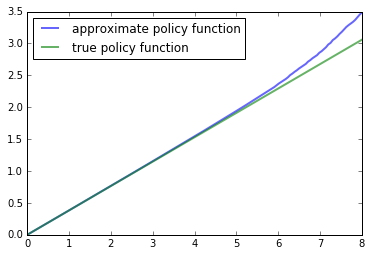

array([  3.82027815e-07,   2.04628268e-02,   4.10953611e-02,
         6.15609074e-02,   8.22023916e-02,   1.02873027e-01,
         1.23389963e-01,   1.43948845e-01,   1.64467547e-01,
         1.85263998e-01,   2.05652715e-01,   2.26331133e-01,
         2.46799376e-01,   2.67537067e-01,   2.88076767e-01,
         3.08559212e-01,   3.29113698e-01,   3.49963917e-01,
         3.70497511e-01,   3.90954038e-01,   4.11714879e-01,
         4.32307854e-01,   4.53059471e-01,   4.73519461e-01,
         4.94335463e-01,   5.14721142e-01,   5.35503666e-01,
         5.56224807e-01,   5.76765303e-01,   5.97570894e-01,
         6.18306984e-01,   6.39004633e-01,   6.59560014e-01,
         6.79932137e-01,   7.00620118e-01,   7.21674346e-01,
         7.42426280e-01,   7.62979122e-01,   7.83604950e-01,
         8.04339506e-01,   8.24886618e-01,   8.45531026e-01,
         8.66353550e-01,   8.87248954e-01,   9.07715528e-01,
         9.28346481e-01,   9.49093371e-01,   9.70118010e-01,
         9.90668965e-01,

In [15]:
%matplotlib inline
lg=LogLinearGrowthModel()
lg.compute_greedy(show_plot=True)